In [5]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

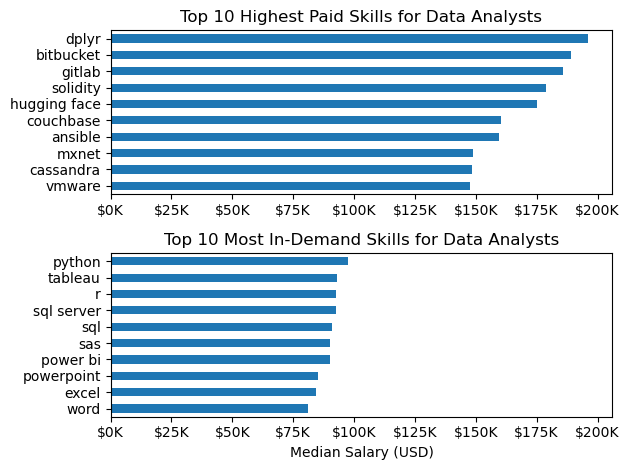

In [12]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills
fig, ax = plt.subplots(2, 1)  



# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

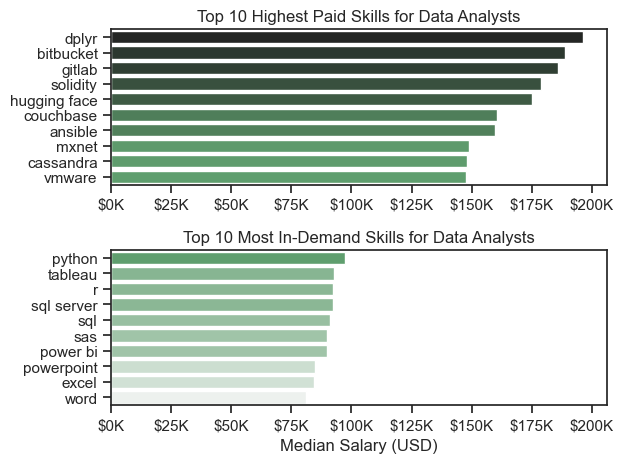

In [37]:
fig, ax = plt.subplots(2, 1)  


sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
sns.barplot(data=df_DA_top_pay, x= 'median', y = df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:g_r')
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].legend().remove()
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_skills, x= 'median', y = df_DA_skills.index, ax=ax[1], hue='median', palette='light:g')
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].legend().remove()
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

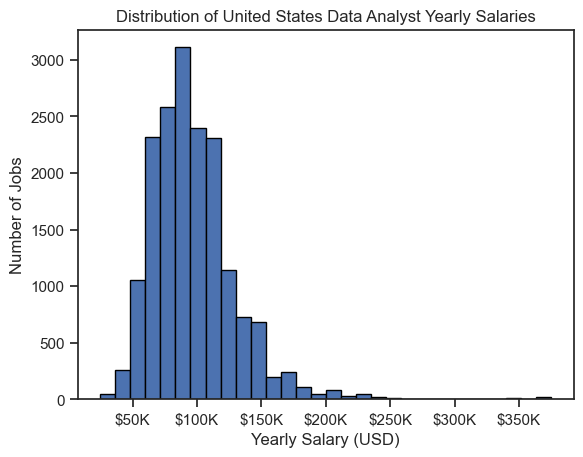

In [38]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()


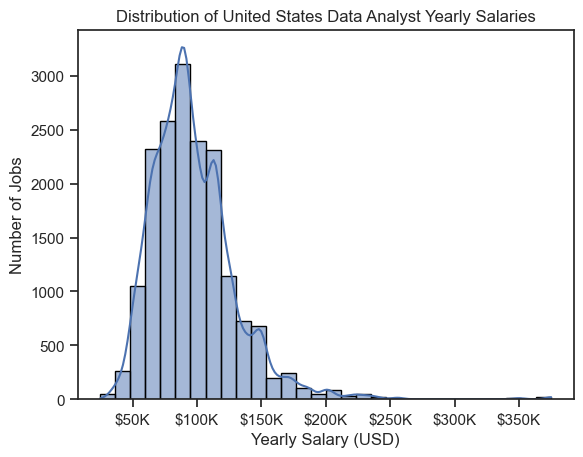

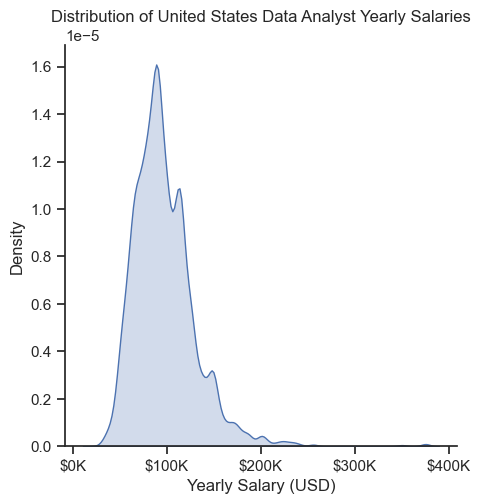

In [46]:
#Sea born hisplot with a kde overlayed for smoothness
sns.histplot(df_DA_US['salary_year_avg'], bins=30, kde=True, stat='count', edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

# Seaborn KDE plot
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True, common_norm=False)

# this is all the same
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density') # Density is the probability of a random variable taking on a particular value
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == x]['salary_year_avg'] for x in job_titles]


,Data Analyst,Data Engineer,Data Scientist
92,NaN,120000.0,NaN
100,NaN,NaN,228222.0
109,89000.0,NaN,NaN
116,NaN,NaN,114000.0
146,NaN,129500.0,NaN
180,90250.0,NaN,NaN
257,NaN,NaN,103128.0
307,NaN,185000.0,NaN
339,NaN,195000.0,NaN
380,NaN,97500.0,NaN


C:\Users\danie\AppData\Local\Temp\ipykernel_10488\1274802962.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


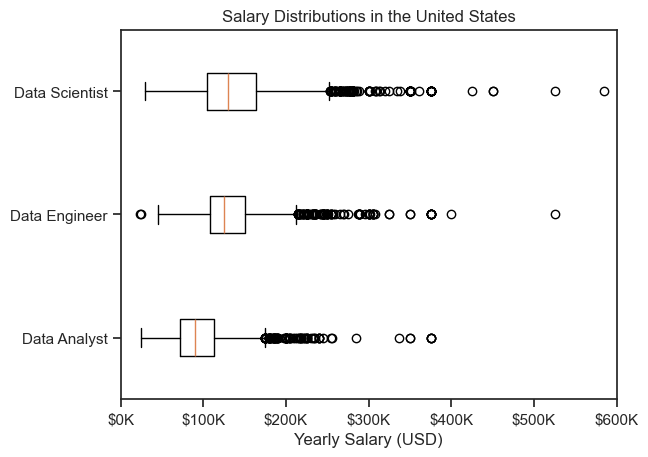

In [48]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

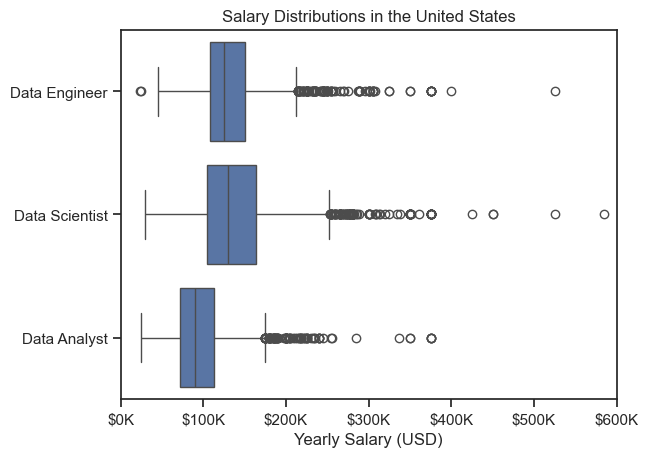

In [54]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()